# Problem Statement

1. You want to but a house but not sure if the open houses you're seeing are listed too high? Buying an overpriced home is a mistake you most certainly want to avoid.

2. You want to sell your house, but end up setting the price too high and did not sell.

The district housing prices currently estimated manually by expert, so it is costly and time consuming!! Our task is to build a prediction model to predict a district's housing price !!

# Importing the data

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close() 

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
df = load_housing_data()

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Take a quick look at the data structure

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


wow!! no missing value. This is great!! ocean_proximity attribute is in object data types. The rest is in float64. 

In [7]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [8]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### note
Usually if the unique value in each attribute is below 10 most probably it is categorical class. Now we almost get the general insight of our dataset, lets list down, what we have here.

1. no missing value, so no need to impute or drop anydata
2. We will need to use OneHotEncoder to Ociean_proximity attribute.

# Further Exploration & Data Transformation

In this part we try to look and clean our data. Our target attribute will median_house_value. There are some questions to answer in this part

1. does our data contain any outliers?
2. Skewed?
3. Any missing data?
4. Correlation
5. nonsense info?
6. data scale

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


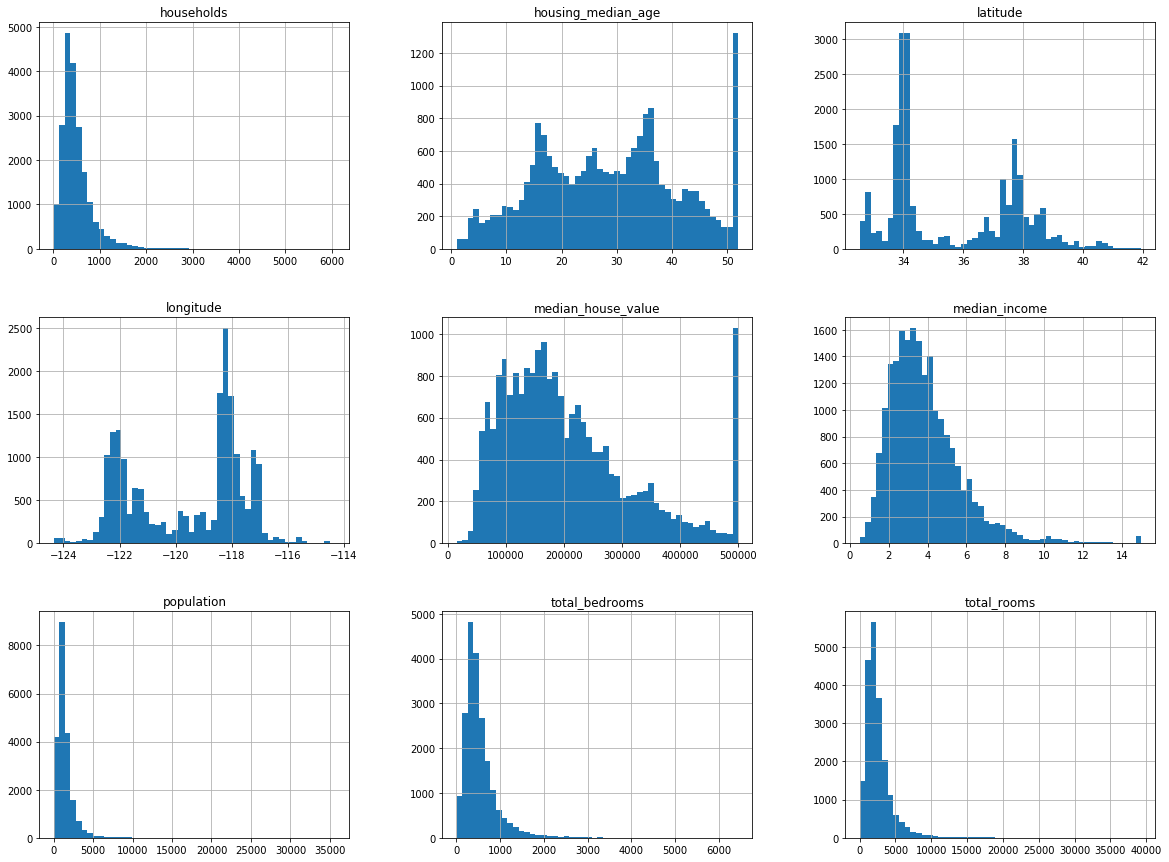

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

### note
1. many attribute are tail heavy to the right
2. different in scale
3. need do some features engineering (total_bedroom,total_rooms in a district doest make any sense or help much. it is better if we know total bedroom and rooms per house, so lets create this later.)

In [11]:
# create 3 new attribute
df["populations_per_household"] = df["population"]/df["households"]
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedroom_per_household"] = df["total_bedrooms"]/df["households"]

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,populations_per_household,rooms_per_household,bedroom_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.555556,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.109842,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.802260,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.547945,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.181467,6.281853,1.081081


In [13]:
#looks on correlation
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.688075
rooms_per_household          0.151948
total_rooms                  0.134153
housing_median_age           0.105623
households                   0.065843
total_bedrooms               0.049686
populations_per_household   -0.023737
population                  -0.024650
longitude                   -0.045967
bedroom_per_household       -0.046739
latitude                    -0.144160
Name: median_house_value, dtype: float64

### note

the correlation coefficient ranges from -1 to 1. when it close to 1 then it means there is strong positive correlation. median house value are likely to go up if median income of that district, rooms per house household goes up. while -1 is negative correlation, the higher the population per house hold the lower the median_house_value.

Totally make sense!!

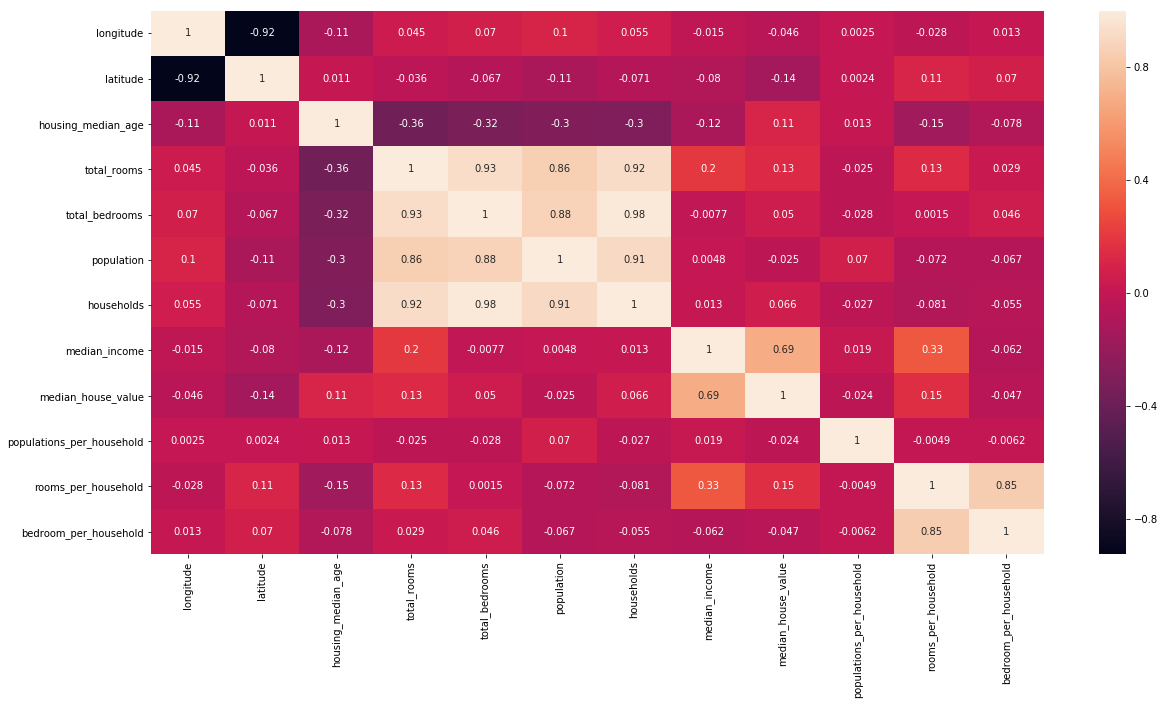

In [14]:
import seaborn as sns
def show_correlations(df, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = df.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(df,show_chart=True)

### note
Figure above is to check correlation between features/attribute.

Correlated features will not always worsen our model, but they will not always improve it either.

some reasons why we would remove correlated features:

1. Make the learning algorithm faster. Due to the curse of dimensionality, less features usually mean high improvement in terms of speed. 

but they affect specific models in different ways and to varying extents:

For linear models (e.g., linear regression or logistic regression), multicolinearity can yield solutions that are wildly varying and possibly numerically unstable.

Random forests can be good at detecting interactions between different features, but highly correlated features can mask these interactions.

In [15]:
numeric_feats = df.dtypes[df.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = df[numeric_feats].skew(axis = 0, skipna = True)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness

,Skew
longitude,-0.297801
latitude,0.465953
housing_median_age,0.060331
total_rooms,4.147343
total_bedrooms,3.459546
population,4.935858
households,3.410438
median_income,1.646657
median_house_value,0.977763
populations_per_household,97.639561


In [23]:
# ignore it, i just want to do some visualization in tableau
df.to_csv("dfhousing.csv")

# Pipelines and modeling

In a typical machine learning workflow you will need to apply all these transformations at least twice. Once when training the model and again on any new data you want to predict on. Of course you could write a function to apply them and reuse that but you would still need to run this first and then call the model separately. Scikit-learn pipelines are a tool to simplify this process. They have several key benefits:

1. They make your workflow much easier to read and understand.
2. They enforce the implementation and order of steps in your project.
3. These in turn make your work much more reproducible.

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_validation_train, y_validation_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [17]:
#to prepare for the transformation needed in our pipelines
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

In [18]:
#transformation pipeline
#OneHotEncoder for ocean_proximity
#Scaling and handling skewed for numerical features

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [19]:
#fit and transform.
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

## try out many others models from various categories of machine learning algo

* the goal here is not to spend to much time tweaking the hyperparameters but to shortlist a few promising models.

In [20]:
import numpy as np
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

classifiers = [
    LinearRegression(),
    RandomForestClassifier(),
    GradientBoostingRegressor(),
    DecisionTreeRegressor(),
    xgb.XGBRegressor(),
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_validation_train)
    y_pred = pipe.predict(X_test)
    mse = mean_squared_error(y_validation_test, y_pred)
    rmse = np.sqrt(mse)
    print(classifier)
    print( "model rmse: %.3f" % rmse)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
model rmse: 69913.994


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model rmse: 91322.547
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
model rmse: 53662.440
Deci

### note
GradientBoostingRegressor perform the best!!

# Next try tweaking the parameters by your own self!! :)

go try yourself, i need to gosok baju since esk is my convocation day. some hints~~ cheers!!

In [21]:
#Grid Search
from sklearn.model_selection import GridSearchCV
GBR = GradientBoostingRegressor()

param_grid = { 
    'n_estimators': [3, 5, 30],
    'max_features': [2, 4, 6, 8],
    }

x_GBR = preprocessor.fit_transform(X_train)

from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(GBR, param_grid, n_jobs= 1)
CV.fit(x_GBR, y_validation_train)  
print(CV.best_params_)    

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_features': 8, 'n_estimators': 30}
